# EDA - Datos socio demográficos y de recursos de salud a nivel de condado de EE. UU. (2018-2019)

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

# 1. Problem statement and data collection

In [3]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


# 2. Exploration and data cleaning
# 2.1 Understanding the features:

In [4]:
# Obtener las dimensiones
print('Our dataframe contains {} rows, indicating the total number of rentals, and has a shape of {}.'.format(len(total_data), total_data.shape))

Our dataframe contains 3140 rows, indicating the total number of rentals, and has a shape of (3140, 108).


In [5]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


# 2.2 Identifying Null Values and data types for each feature

In [6]:
total_data.isna().sum()[total_data.isna().sum()>0]

Series([], dtype: int64)

# 2.3 Looking for duplicated and dropping them, if any.

In [7]:
#Eliminamos los duplicados
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


# 2.4 Dealing with null values

In [8]:
#Sacamos el porcentaje de valores NaN
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

fips                      0.0
TOT_POP                   0.0
0-9                       0.0
0-9 y/o % of total pop    0.0
19-Oct                    0.0
                         ... 
CKD_prevalence            0.0
CKD_Lower 95% CI          0.0
CKD_Upper 95% CI          0.0
CKD_number                0.0
Urban_rural_code          0.0
Length: 108, dtype: float64

# 3. Univariate Analysis
# 3.1 Dividing our dataset into categorial and numerical.

In [9]:
#Analizamos los tipos de información que tenemos
total_data.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [10]:
keep_columns = [
    "TOT_POP", "COUNTY_NAME", "STATE_NAME", "0-9", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "R_NET_MIG_2018", "PCTPOVALL_2018",
    "MEDHHINC_2018", "Civilian_labor_force_2018", "Unemployed_2018", "Employed_2018", "Active Physicians per 100000 Population 2018 (AAMC)", "Active General Surgeons per 100000 Population 2018 (AAMC)", "Total nurse practitioners (2019)", 
    "Total physician assistants (2019)", "Total Hospitals (2019)", "Internal Medicine Primary Care (2019)", 
    "Family Medicine/General Practice Primary Care (2019)", "Total Specialist Physicians (2019)", 
    "Population Aged 60+", "anycondition_number", "Heart disease_number", "diabetes_number", "Obesity_number", "COPD_number", "COPD_prevalence", "CKD_number", "Urban_rural_code"
]

df_filtered = total_data[keep_columns]

In [11]:
#Dividimos el datafram original por valores numéricos y categóricos
num = ['int64', 'float64']
cat = ['O']

df_num = df_filtered.select_dtypes(num)
df_cat = total_data.select_dtypes(cat)

In [12]:
df_cat.head(3)

,COUNTY_NAME,STATE_NAME
0,Autauga,Alabama
1,Baldwin,Alabama
2,Barbour,Alabama


# 3.2 Categorical Variable Analysis

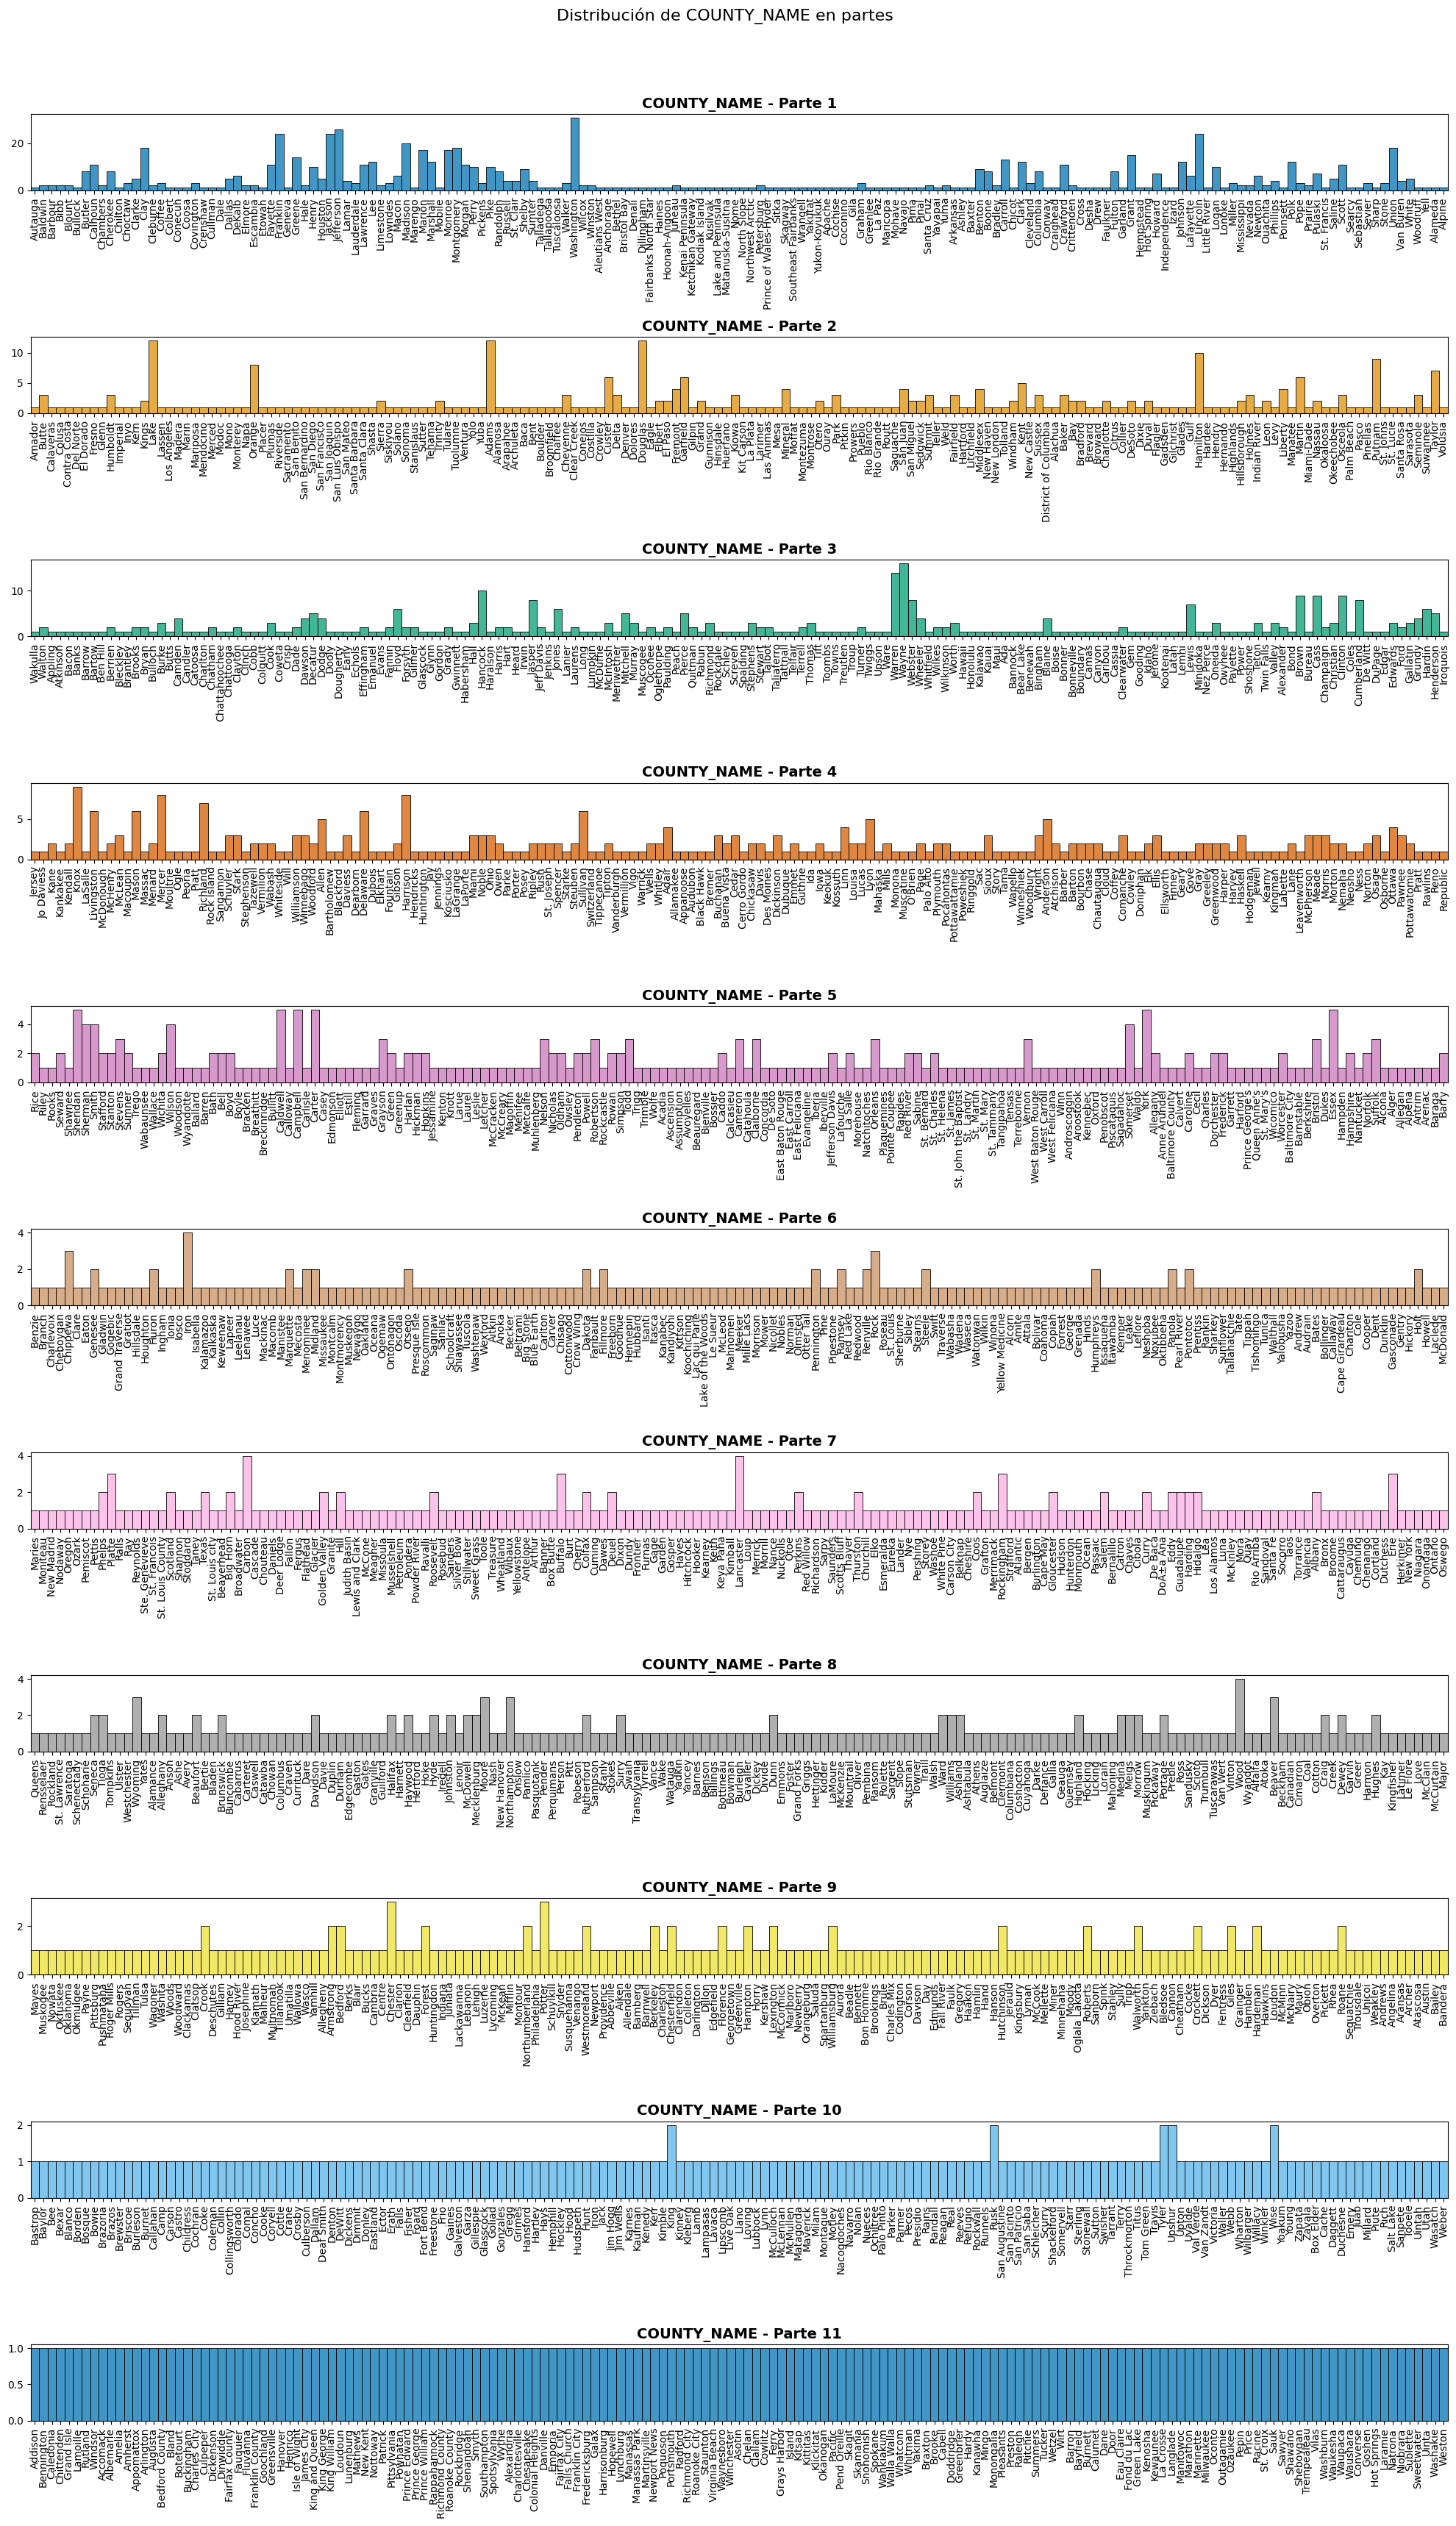

In [13]:
county_names = df_cat['COUNTY_NAME'].unique()
num_particiones = 11
divisiones = np.array_split(county_names, num_particiones)

fig, axis = plt.subplots(num_particiones, 1, figsize=(20, 35))
fig.suptitle("Distribución de COUNTY_NAME en partes", fontsize=16)

colores = sns.color_palette("colorblind", num_particiones)

for i, division in enumerate(divisiones):
    subset = df_cat[df_cat['COUNTY_NAME'].isin(division)]
    ax = axis[i]
    sns.histplot(data=subset, x="COUNTY_NAME", ax=ax, color=colores[i]).set(xlabel=None, ylabel=None)
    ax.set_title(f"COUNTY_NAME - Parte {i+1}", fontsize=14, fontweight='bold')
    ax.tick_params(axis='x', rotation=90)
    ax.margins(x=0)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

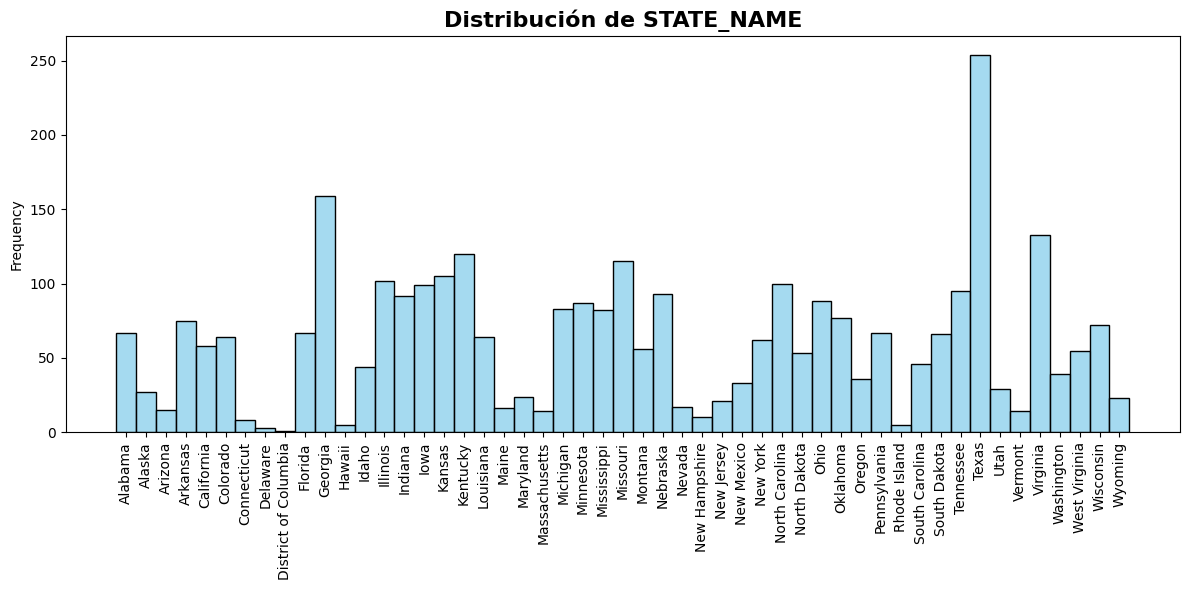

In [14]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df_cat, x="STATE_NAME", color="skyblue").set(xlabel=None, ylabel="Frequency")
plt.title("Distribución de STATE_NAME", fontsize=16, fontweight='bold')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Analisis

# 3.3 Numerical Variable Analysis

In [15]:
df_num.head()

,TOT_POP,0-9,20-29,30-39,40-49,50-59,60-69,70-79,80+,R_NET_MIG_2018,...,Total Specialist Physicians (2019),Population Aged 60+,anycondition_number,Heart disease_number,diabetes_number,Obesity_number,COPD_number,COPD_prevalence,CKD_number,Urban_rural_code
0,55601,6787,6878,7089,7582,7738,5826,4050,2014,0.6,...,72.142154,10523,20181,3345,5462,15193,3644,8.6,1326,3
1,218022,24757,23579,25213,27338,29986,29932,20936,9368,24.8,...,282.882982,53519,68790,13414,20520,50761,14692,8.6,5479,4
2,24881,2732,3268,3201,3074,3278,3076,2244,1048,-8.6,...,32.283033,6150,11325,2159,3870,8013,2373,12.1,887,6
3,22400,2456,3029,3113,3038,3115,2545,1723,785,-6.6,...,29.063942,4773,9190,1533,2511,6894,1789,10.0,595,2
4,57840,7095,6742,6884,7474,7844,6965,4931,2335,0.0,...,75.047251,13600,20584,4101,6017,15112,4661,10.5,1507,2


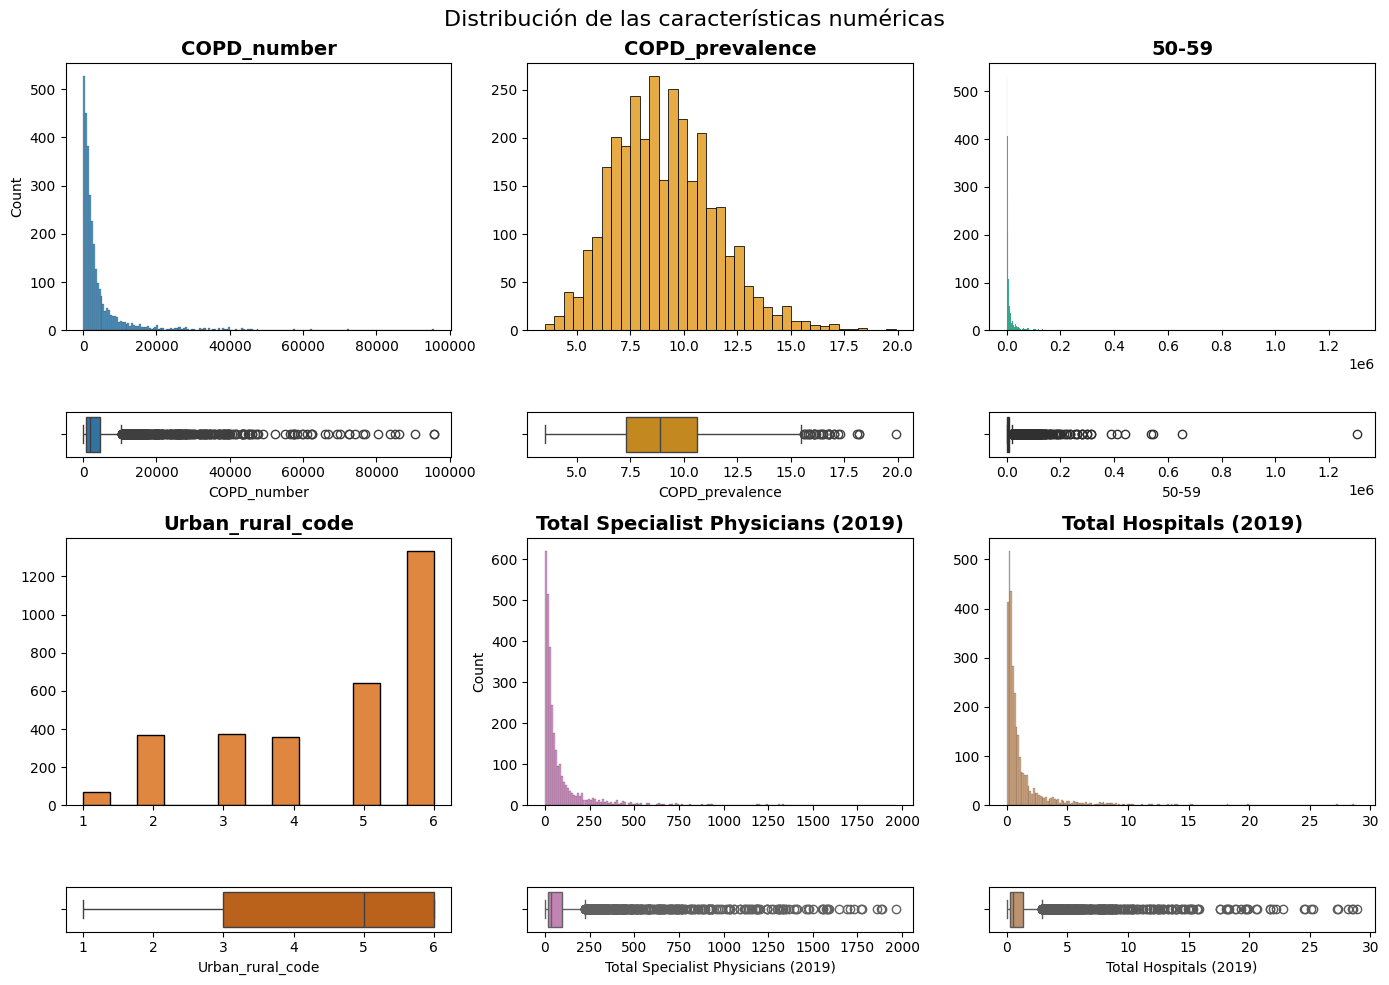

In [16]:
#Analisis con histogramas y boxplot de las características numéricas
fig, axis = plt.subplots(4, 3, figsize = (14, 10), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})
fig.suptitle("Distribución de las características numéricas", fontsize=16)

sns.histplot(ax = axis[0, 0], data = df_num[df_num["COPD_number"] < 100000], x = "COPD_number").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_num[df_num["COPD_number"] < 100000], x = "COPD_number")

sns.histplot(ax = axis[0, 1], data = df_num, x = "COPD_prevalence", color=sns.color_palette("colorblind")[1]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df_num, x = "COPD_prevalence", color=sns.color_palette("colorblind")[1])

sns.histplot(ax = axis[0, 2], data = df_num, x = "50-59", color=sns.color_palette("colorblind")[2]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df_num, x = "50-59", color=sns.color_palette("colorblind")[2])

sns.histplot(ax = axis[2, 0], data = df_num, x = "Urban_rural_code", color=sns.color_palette("colorblind")[3]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = df_num, x = "Urban_rural_code", color=sns.color_palette("colorblind")[3])

sns.histplot(ax = axis[2, 1], data = df_num[df_num["Total Specialist Physicians (2019)"] < 2000], x = "Total Specialist Physicians (2019)", color=sns.color_palette("colorblind")[4]).set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = df_num[df_num["Total Specialist Physicians (2019)"] < 2000], x = "Total Specialist Physicians (2019)", color=sns.color_palette("colorblind")[4])

sns.histplot(ax = axis[2, 2], data = df_num[df_num["Total Hospitals (2019)"] < 30], x = "Total Hospitals (2019)", color=sns.color_palette("colorblind")[5]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = df_num[df_num["Total Hospitals (2019)"] < 30], x = "Total Hospitals (2019)", color=sns.color_palette("colorblind")[5])

axis[0, 0].set_title("COPD_number", fontsize=14, fontweight='bold')
axis[0, 1].set_title("COPD_prevalence", fontsize=14, fontweight='bold')
axis[0, 2].set_title("50-59", fontsize=14, fontweight='bold')
axis[2, 0].set_title("Urban_rural_code", fontsize=14, fontweight='bold')
axis[2, 1].set_title("Total Specialist Physicians (2019)", fontsize=14, fontweight='bold')
axis[2, 2].set_title("Total Hospitals (2019)", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Analisis

# 4. Multivariate Analysis

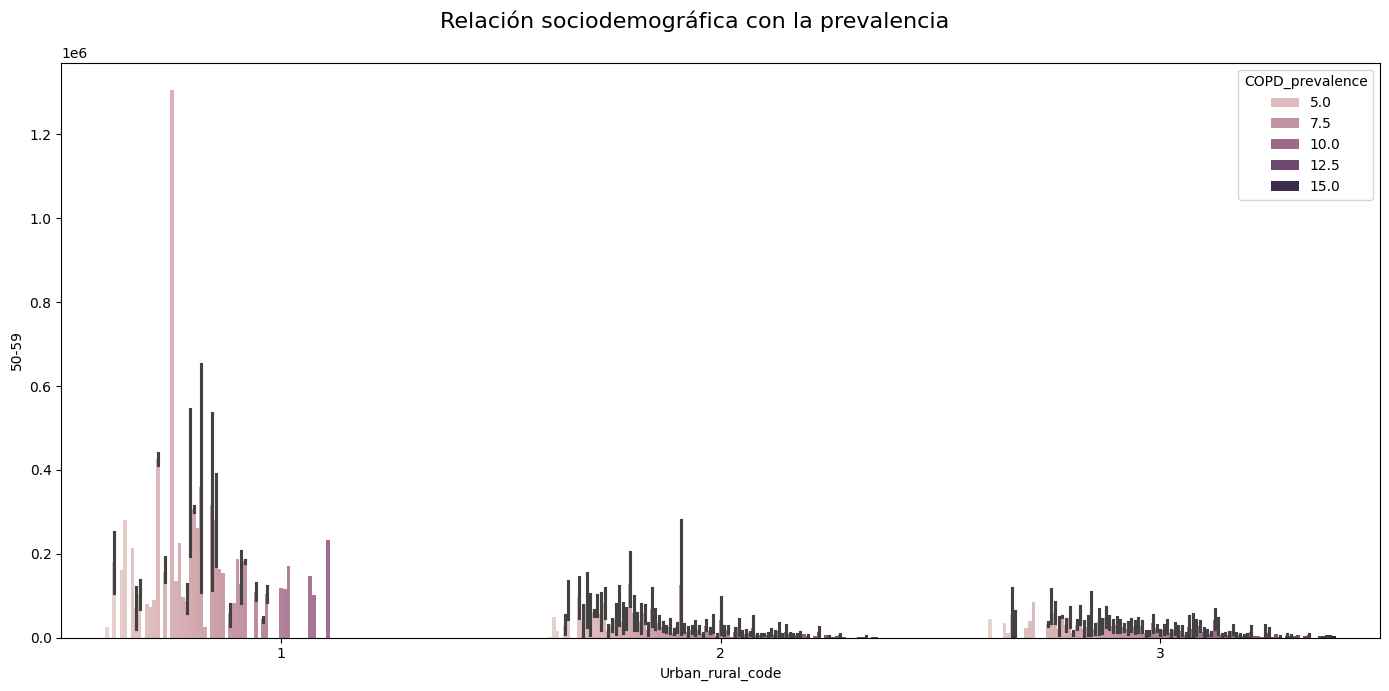

In [17]:
#Análisis combinando varias variables
fig, axis = plt.subplots(figsize = (14, 7))
fig.suptitle("Relación sociodemográfica con la prevalencia", fontsize=16)

sns.barplot(data = df_num[df_num["Urban_rural_code"] < 4], x = "Urban_rural_code", y = "50-59", hue = "COPD_prevalence")

plt.tight_layout()
plt.show()


Conclusiones:

- El gráfico sugiere que la prevalencia de EPOC está más concentrada en áreas urbanas, afectando principalmente a la población en edades entre 50 y 59 años.
- Las áreas menos urbanizadas muestran una menor prevalencia, lo que podría estar relacionado con diferencias en el **estilo de vida, exposición ambiental, y acceso a servicios de salud**.

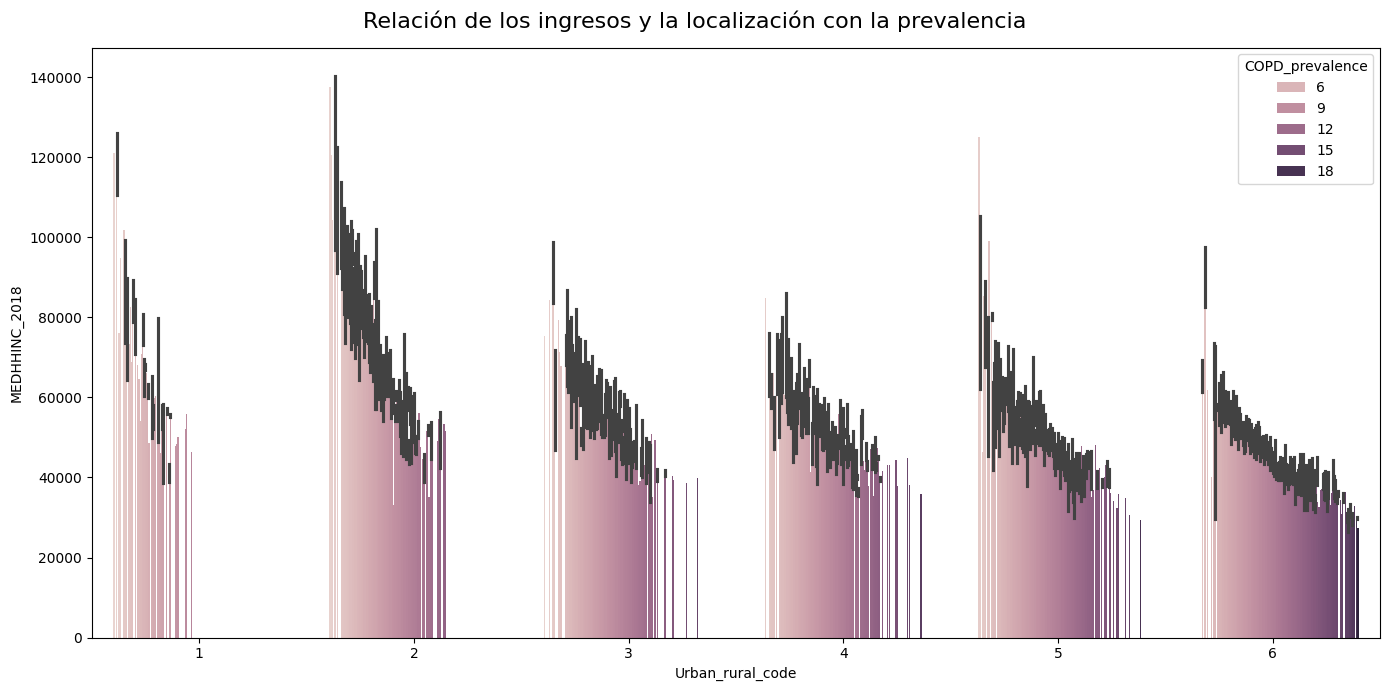

In [18]:
fig, axis = plt.subplots(figsize = (14, 7))
fig.suptitle("Relación de los ingresos y la localización con la prevalencia", fontsize=16)

sns.barplot(data = df_num, x = "Urban_rural_code", y = "MEDHHINC_2018", hue = "COPD_prevalence")

plt.tight_layout()
plt.show()

Se observa lo siguiente:

- Hay una notable variabilidad en la prevalencia de EPOC dentro de cada categoría de urbanización, pero la tendencia general es que las áreas con **menor ingreso** presentan una mayor prevalencia de EPOC.
- Esta tendencia puede estar vinculada a factores socioeconómicos, como el acceso limitado a servicios de salud, mayor exposición a contaminantes rurales (e.g., polvo agrícola), o mayores tasas de tabaquismo en comunidades con menor ingreso.
- Áreas rurales muestran tanto **menores ingresos** como mayor prevalencia de EPOC, lo que podría sugerir que **factores como el acceso limitado a atención médica y condiciones socioeconómicas más desfavorables** están influyendo en los resultados.
- En áreas urbanas, a pesar de los **altos ingresos**, la prevalencia de EPOC es relativamente baja, lo que puede indicar un **mejor acceso a servicios de salud**, mayor conciencia sobre los factores de riesgo, o mejor calidad del aire en ciertas zonas urbanas.

# 4.1 Encoding Categorical Values and Saving JSON files

In [19]:
cn = list(df_filtered['COUNTY_NAME'].unique())
COUNTY_NAME_encoded = dict(zip(cn, list(range(len(cn)))))

with open('../data/interim/COUNTY_NAME_encoded.json', 'w') as f: 
    json.dump(COUNTY_NAME_encoded, f)

In [20]:
sn = list(df_filtered['STATE_NAME'].unique())
STATE_NAME_encoded = dict(zip(sn, list(range(len(sn)))))

with open('../data/interim/STATE_NAME_encoded.json', 'w') as f:
    json.dump(STATE_NAME_encoded, f)

In [21]:
#Hacemos una copia del data frame con outliers
df_enc = df_filtered.copy()

In [22]:
df_enc['COUNTY_NAME_encoded'] = df_enc['COUNTY_NAME'].map(COUNTY_NAME_encoded)
df_enc['STATE_NAME_encoded'] = df_enc['STATE_NAME'].map(STATE_NAME_encoded)

df_enc.drop(columns=['COUNTY_NAME', 'STATE_NAME'], inplace=True)
df_enc.head(3)

,TOT_POP,0-9,20-29,30-39,40-49,50-59,60-69,70-79,80+,R_NET_MIG_2018,...,anycondition_number,Heart disease_number,diabetes_number,Obesity_number,COPD_number,COPD_prevalence,CKD_number,Urban_rural_code,COUNTY_NAME_encoded,STATE_NAME_encoded
0,55601,6787,6878,7089,7582,7738,5826,4050,2014,0.6,...,20181,3345,5462,15193,3644,8.6,1326,3,0,0
1,218022,24757,23579,25213,27338,29986,29932,20936,9368,24.8,...,68790,13414,20520,50761,14692,8.6,5479,4,1,0
2,24881,2732,3268,3201,3074,3278,3076,2244,1048,-8.6,...,11325,2159,3870,8013,2373,12.1,887,6,2,0


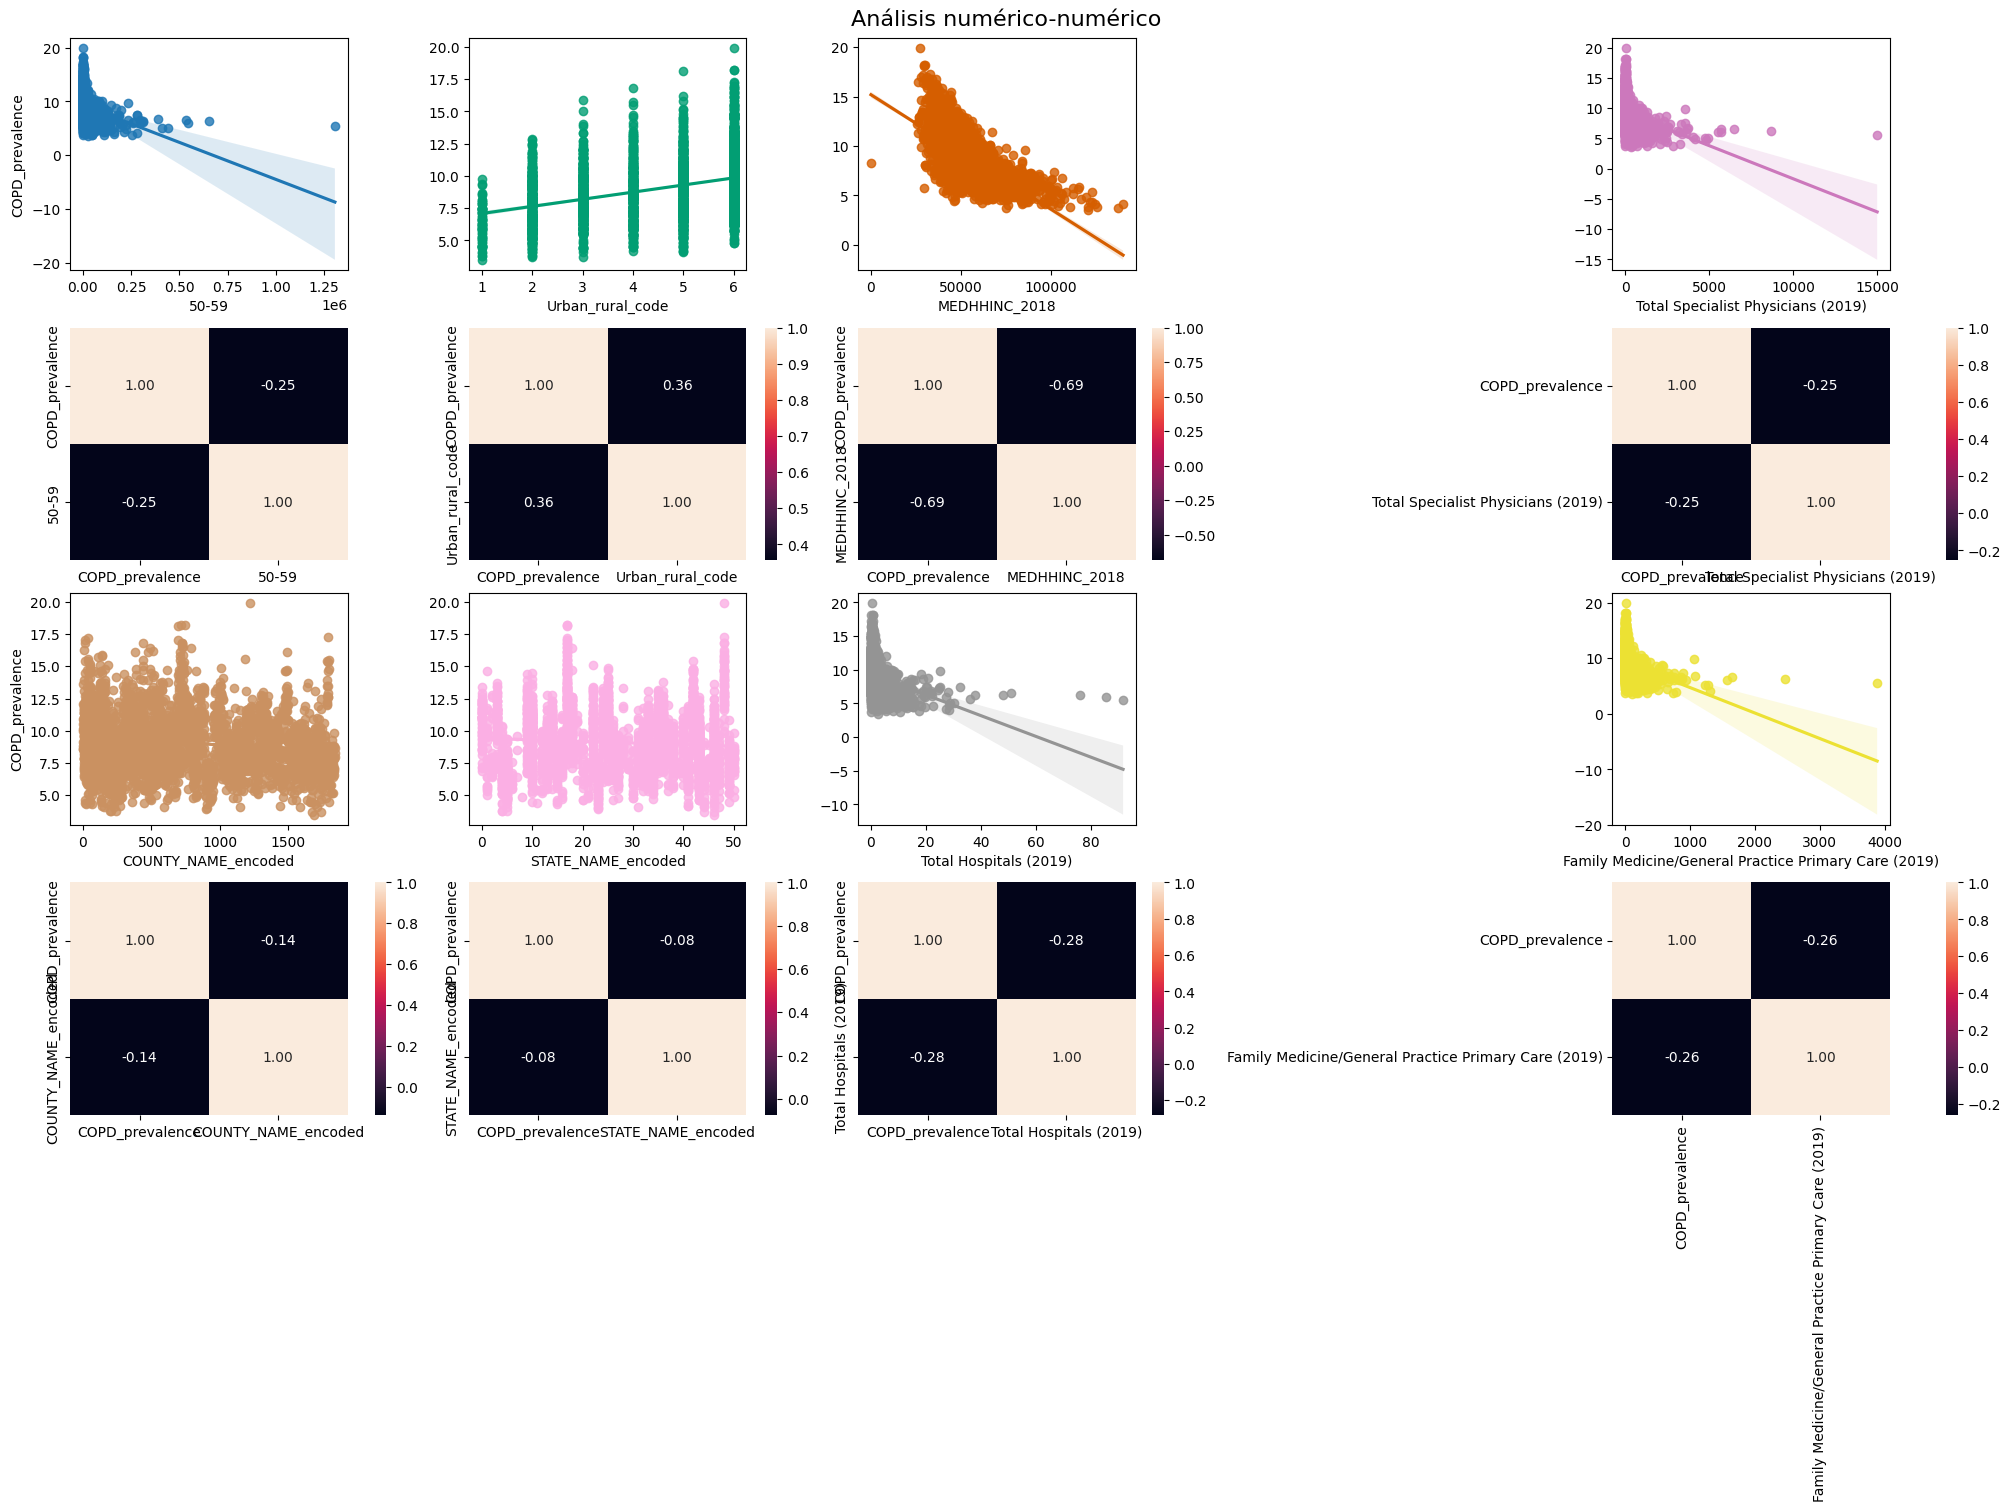

In [23]:
#Analisis de varias variables pt.2
fig, axis = plt.subplots(4, 4, figsize = (20, 15), constrained_layout=True)
fig.suptitle("Análisis numérico-numérico", fontsize=16)


sns.regplot(ax = axis[0, 0], data = df_enc, x = "50-59", y = "COPD_prevalence")
sns.heatmap(df_enc[["COPD_prevalence", "50-59"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df_enc, x = "Urban_rural_code", y = "COPD_prevalence", color=sns.color_palette("colorblind")[2]).set(ylabel = None)
sns.heatmap(df_enc[["COPD_prevalence", "Urban_rural_code"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = df_enc, x = "MEDHHINC_2018", y = "COPD_prevalence", color=sns.color_palette("colorblind")[3]).set(ylabel = None)
sns.heatmap(df_enc[["COPD_prevalence", "MEDHHINC_2018"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2]).set(ylabel = None)

sns.regplot(ax = axis[0, 3], data = df_enc, x = "Total Specialist Physicians (2019)", y = "COPD_prevalence", color=sns.color_palette("colorblind")[4]).set(ylabel = None)
sns.heatmap(df_enc[["COPD_prevalence", "Total Specialist Physicians (2019)"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3]).set(ylabel = None)

sns.regplot(ax = axis[2, 0], data = df_enc, x = "COUNTY_NAME_encoded", y = "COPD_prevalence", color=sns.color_palette("colorblind")[5])
sns.heatmap(df_enc[["COPD_prevalence", "COUNTY_NAME_encoded"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = df_enc, x = "STATE_NAME_encoded", y = "COPD_prevalence", color=sns.color_palette("colorblind")[6]).set(ylabel = None)
sns.heatmap(df_enc[["COPD_prevalence", "STATE_NAME_encoded"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1]).set(ylabel = None)

sns.regplot(ax = axis[2, 2], data = df_enc, x = "Total Hospitals (2019)", y = "COPD_prevalence", color=sns.color_palette("colorblind")[7]).set(ylabel = None)
sns.heatmap(df_enc[["COPD_prevalence", "Total Hospitals (2019)"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2]).set(ylabel = None)

sns.regplot(ax = axis[2, 3], data = df_enc, x = "Family Medicine/General Practice Primary Care (2019)", y = "COPD_prevalence", color=sns.color_palette("colorblind")[8]).set(ylabel = None)
sns.heatmap(df_enc[["COPD_prevalence", "Family Medicine/General Practice Primary Care (2019)"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 3]).set(ylabel = None)


plt.show()

analisis

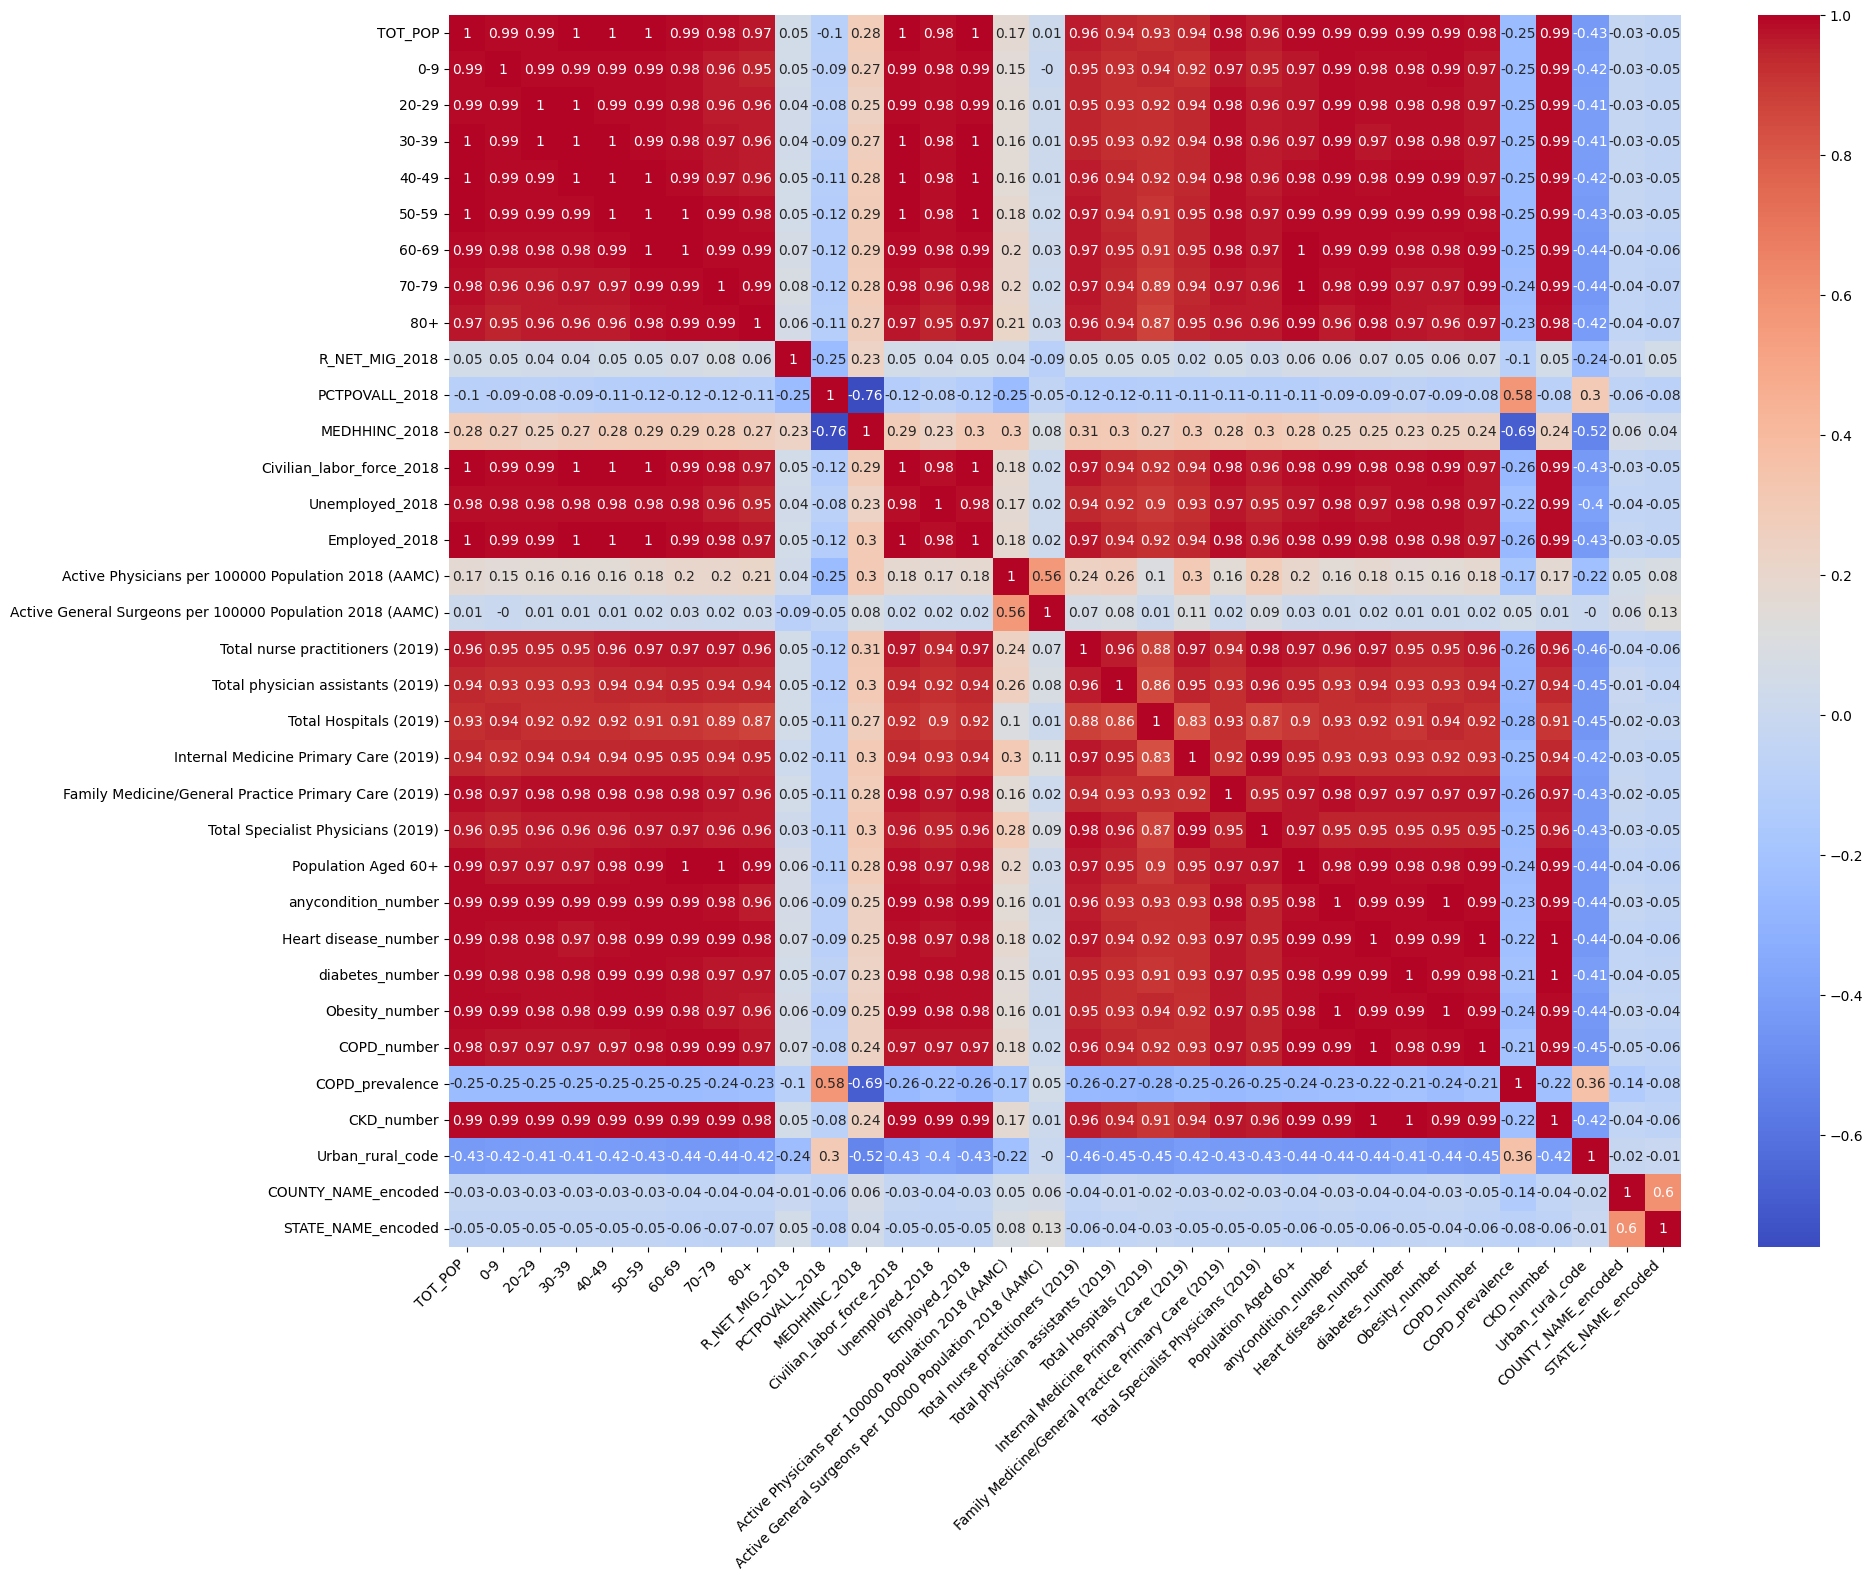

In [24]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_enc.corr().round(2), annot=True, cmap='coolwarm', square=True)
plt.xticks(rotation=45, ha='right')

plt.show()

# 5. Feature Engineering
# 5.1 Outlier Analysis

In [25]:
#Análisis de outliers
df_enc.describe().round(2)

,TOT_POP,0-9,20-29,30-39,40-49,50-59,60-69,70-79,80+,R_NET_MIG_2018,...,anycondition_number,Heart disease_number,diabetes_number,Obesity_number,COPD_number,COPD_prevalence,CKD_number,Urban_rural_code,COUNTY_NAME_encoded,STATE_NAME_encoded
count,3140.00,3140.0,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,...,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00
mean,104189.41,12740.3,14469.33,13916.49,12885.21,13638.03,11916.21,7220.31,4035.54,1.12,...,33385.40,5597.59,9326.58,25276.13,5827.24,9.10,2466.23,4.64,688.48,26.25
std,333583.40,41807.3,49577.73,48990.95,43472.19,42720.63,34518.58,20287.50,12063.78,11.39,...,98886.69,15615.29,29754.60,74466.84,15720.55,2.34,7730.42,1.51,541.77,14.26
min,88.00,0.0,0.00,11.00,4.00,14.00,20.00,6.00,0.00,-62.10,...,41.00,7.00,11.00,25.00,7.00,3.50,3.00,1.00,0.00,0.00
25%,10963.25,1280.5,1263.75,1232.75,1245.25,1483.00,1476.50,950.75,533.00,-5.00,...,4215.00,798.50,1187.75,3075.00,815.00,7.30,314.75,3.00,182.00,14.00
50%,25800.50,3057.0,3108.00,3000.50,3048.50,3515.50,3410.00,2177.00,1160.00,0.50,...,9753.00,1814.50,2743.00,7182.50,1963.50,8.90,718.00,5.00,564.00,25.00
75%,67913.00,8097.0,8976.25,8314.25,8120.50,9157.25,8710.50,5574.00,2899.75,6.82,...,25001.25,4376.00,6679.25,18542.50,4727.00,10.60,1776.25,6.00,1129.25,40.00
max,10105518.00,1208253.0,1557073.00,1501844.00,1350076.00,1306003.00,1014325.00,572530.00,356275.00,69.40,...,2877316.00,434790.00,952335.00,2097906.00,434075.00,19.90,237766.00,6.00,1840.00,50.00


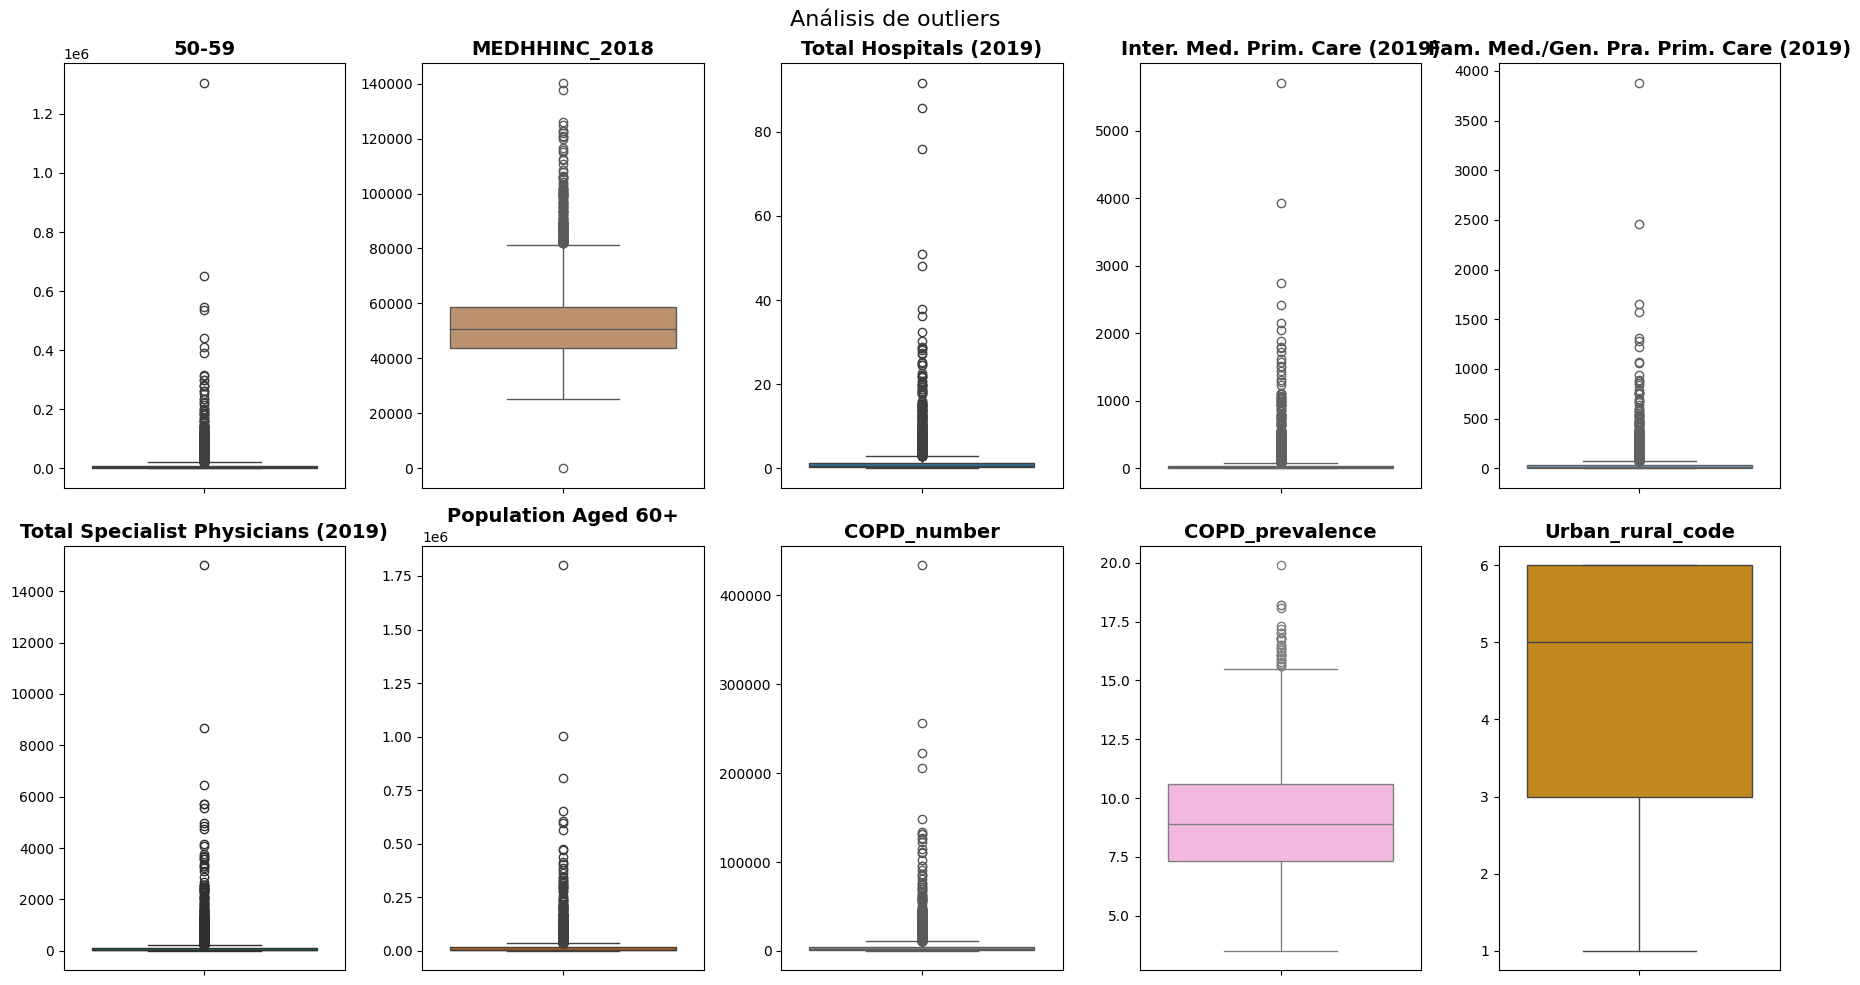

In [31]:
fig, axes = plt.subplots(2, 5, figsize = (18, 10))
fig.suptitle("Análisis de outliers", fontsize=16)

sns.boxplot(ax = axes[0, 0], data = df_enc, y = "50-59").set_title("50-59", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 1], data = df_enc, y = "MEDHHINC_2018", color=sns.color_palette("colorblind")[5]).set_title("MEDHHINC_2018", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 2], data = df_enc, y = "Total Hospitals (2019)").set_title("Total Hospitals (2019)", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 3], data = df_enc, y = "Internal Medicine Primary Care (2019)", color=sns.color_palette("colorblind")[4]).set_title("Inter. Med. Prim. Care (2019)", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 4], data = df_enc, y = "Family Medicine/General Practice Primary Care (2019)", color=sns.color_palette("colorblind")[9]).set_title("Fam. Med./Gen. Pra. Prim. Care (2019)", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 0], data = df_enc, y = "Total Specialist Physicians (2019)", color=sns.color_palette("colorblind")[2]).set_title("Total Specialist Physicians (2019)", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 1], data = df_enc, y = "Population Aged 60+", color=sns.color_palette("colorblind")[3]).set_title("Population Aged 60+", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 2], data = df_enc, y = "COPD_number", color=sns.color_palette("colorblind")[7]).set_title("COPD_number", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 3], data = df_enc, y = "COPD_prevalence", color=sns.color_palette("colorblind")[6]).set_title("COPD_prevalence", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 4], data = df_enc, y = "Urban_rural_code", color=sns.color_palette("colorblind")[1]).set_title("Urban_rural_code", fontsize=14, fontweight='bold')

for ax in axes.flatten():
    if ax: 
        ax.set(ylabel=None)

plt.tight_layout()
plt.show()